# **통계적 모델을 이용한 시계열 분석**

전통적인 통계 모델은 시계열 데이터를 기반으로 패턴을 분석하여 미래 값을 예측하는 통계적 접근을 시행한다. 

## 필요 라이브러리 임포트

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

## 데이터 로드

해당 데이터는 각 행이 1분 단위로 구분되어 있는 시계열 데이터이므로, 시간을 나타내는 Timestamp를 index로 설정한다. 

In [4]:
data_path = "../data/raw/Manufacturing_dataset.csv"
df = pd.read_csv(data_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.head()

,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
Timestamp,,,,,,
2025-04-01 08:00:00,78.92,1461,8.49,0.07,1.97,0
2025-04-01 08:01:00,71.83,1549,8.97,0.04,1.01,0
2025-04-01 08:02:00,74.88,1498,8.52,0.08,1.60,0
2025-04-01 08:03:00,77.27,1478,8.28,0.09,1.87,0
2025-04-01 08:04:00,76.50,1524,8.07,0.04,1.53,0


Feature(x)는 Temperature, Machine Speed, Production Quality Score, Vibration Level, Energy Consumption 5개 column이며, Optimzal Condition(y)이 매 분마다 평가된다. 

## 시계열 시각화

시계열 데이터를 그래프로 시각화하여 데이터에 내재하는 시계열의 특성(추세, 계절성, 주기성)을 확인한다. 

In [18]:
## 데이터의 각 feature에 대한 시계열 시각화하는 함수
def plot_time_series(data, feature, size: int, title):
    plt.figure(figsize=(20, 12))
    data = data[:size]
    plt.plot(data.index, data[feature], label=feature)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

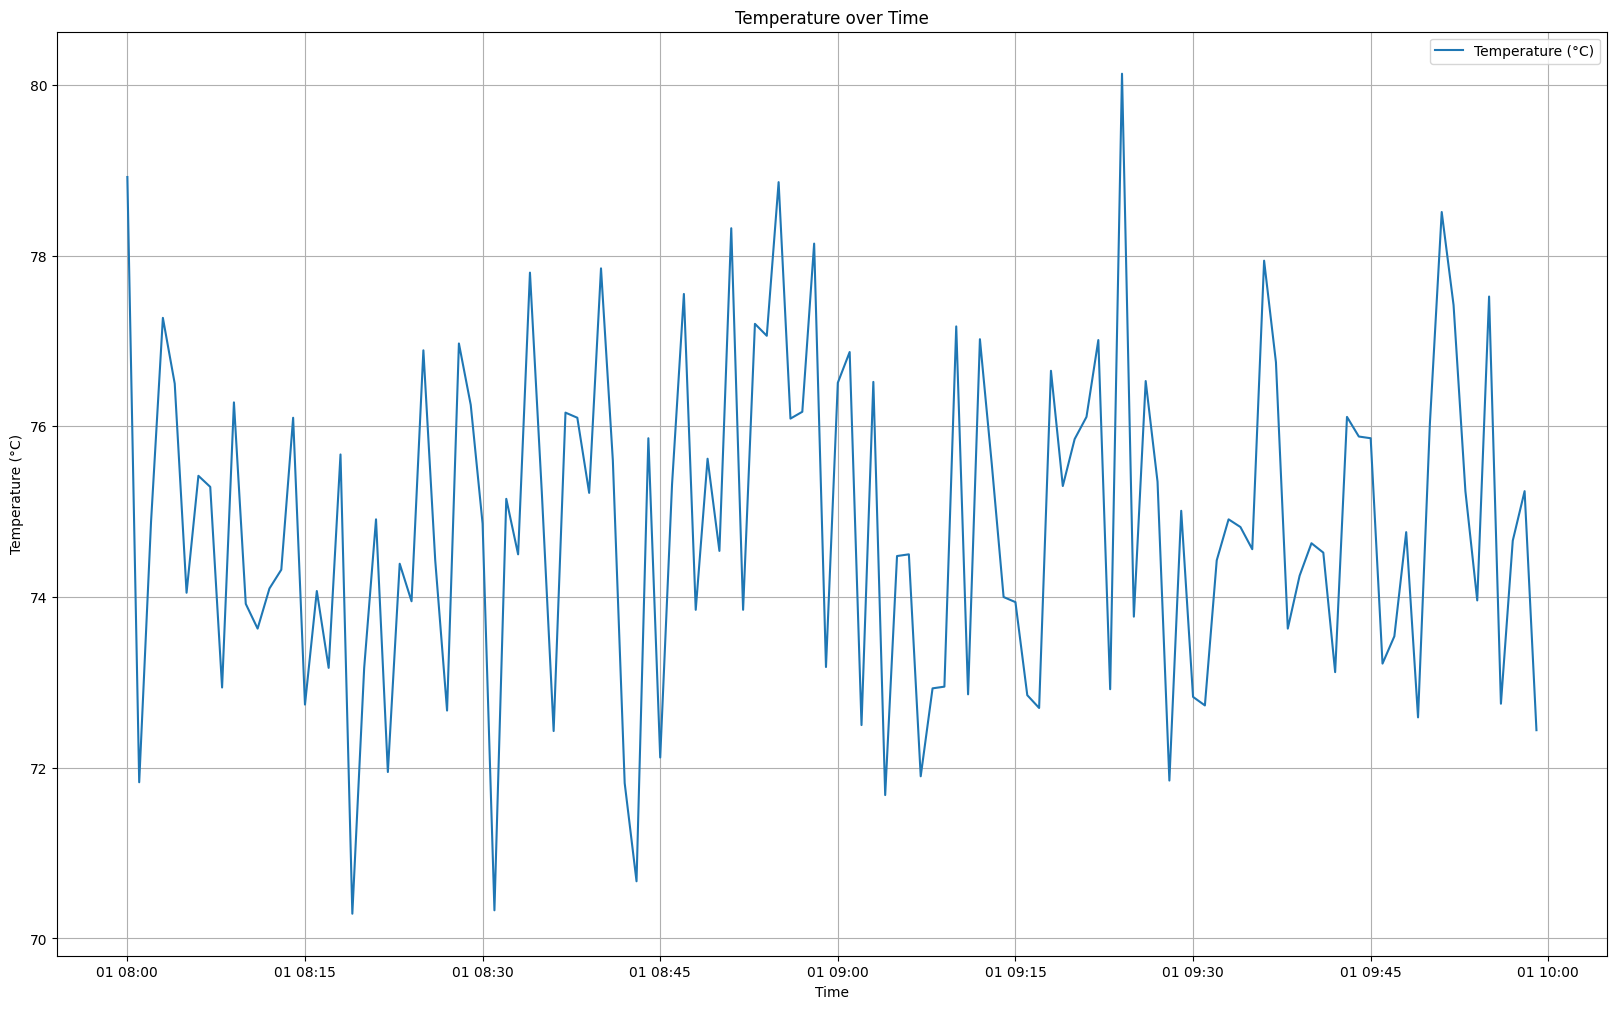

In [22]:
plot_time_series(df, "Temperature (°C)", 60*2, "Temperature over Time")

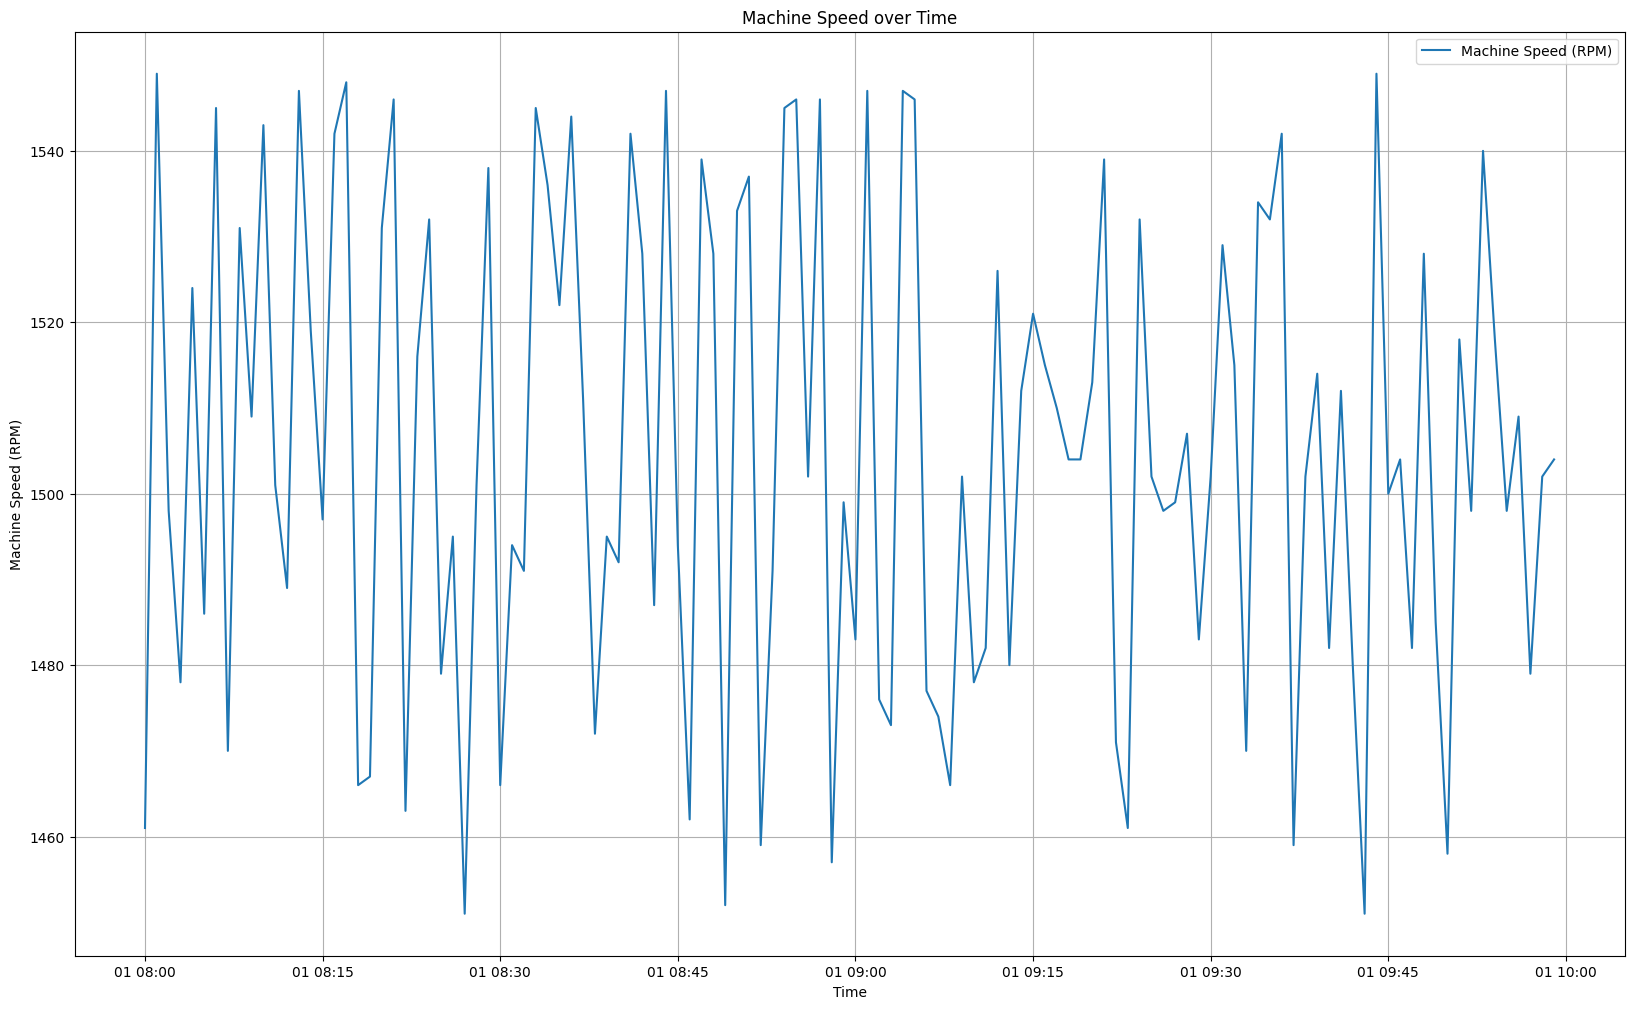

In [23]:
plot_time_series(df, "Machine Speed (RPM)", 60*2, "Machine Speed over Time")

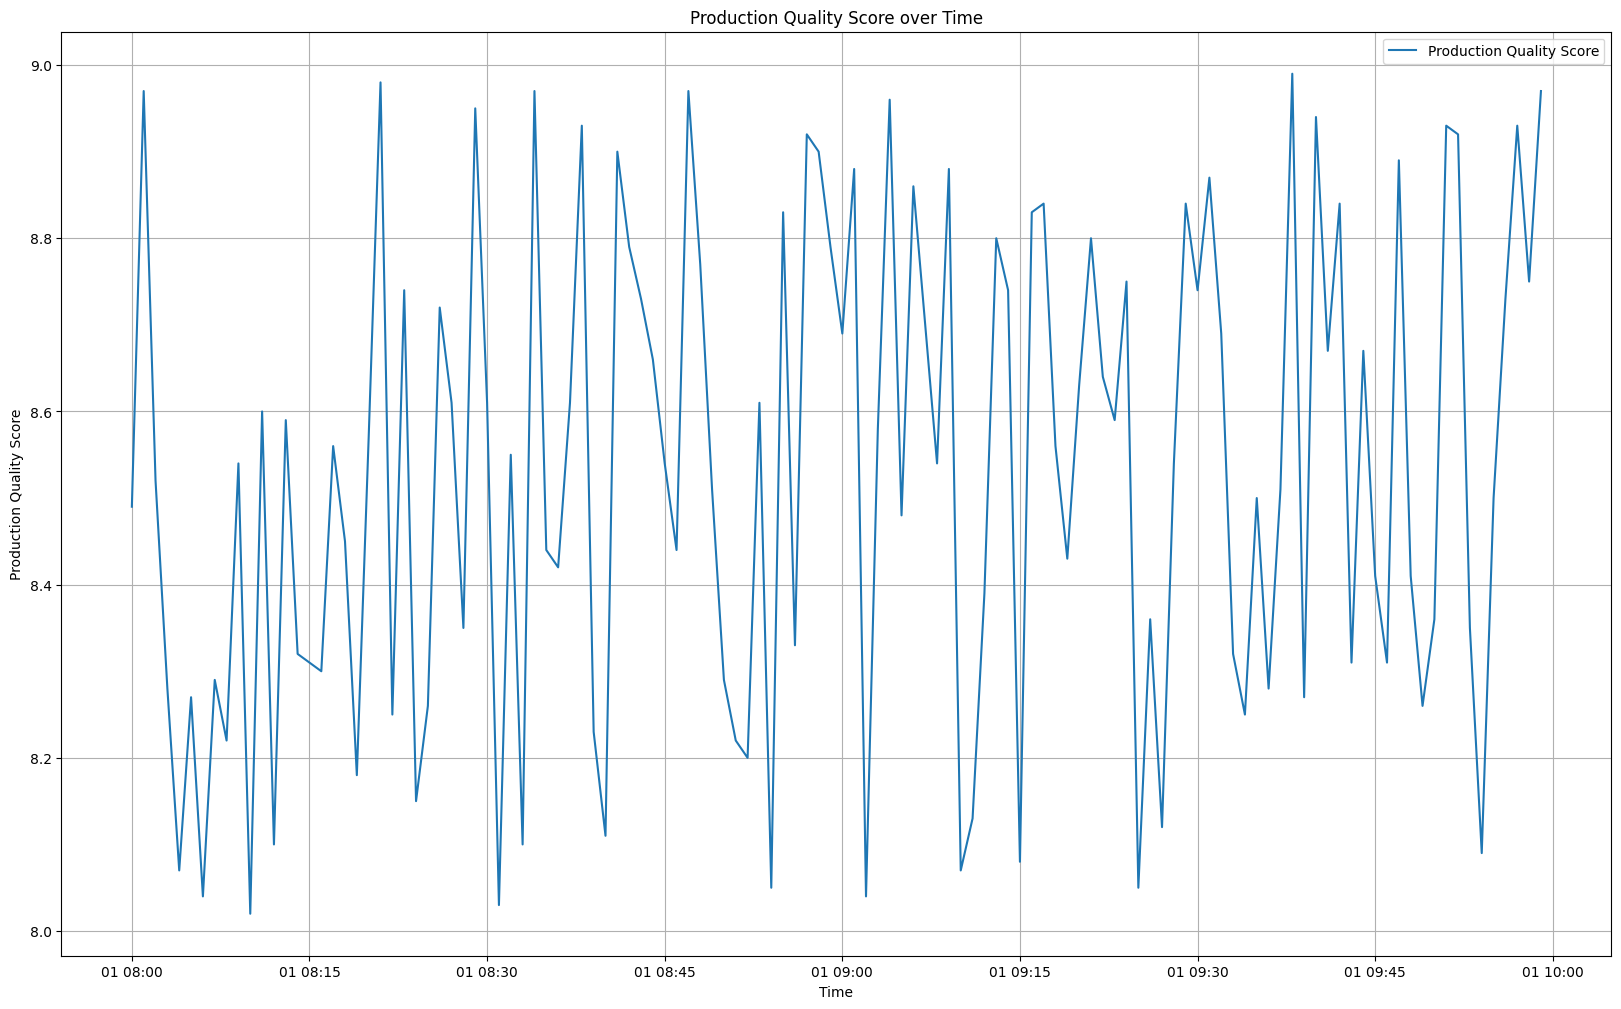

In [24]:
plot_time_series(df, "Production Quality Score", 60*2, "Production Quality Score over Time")

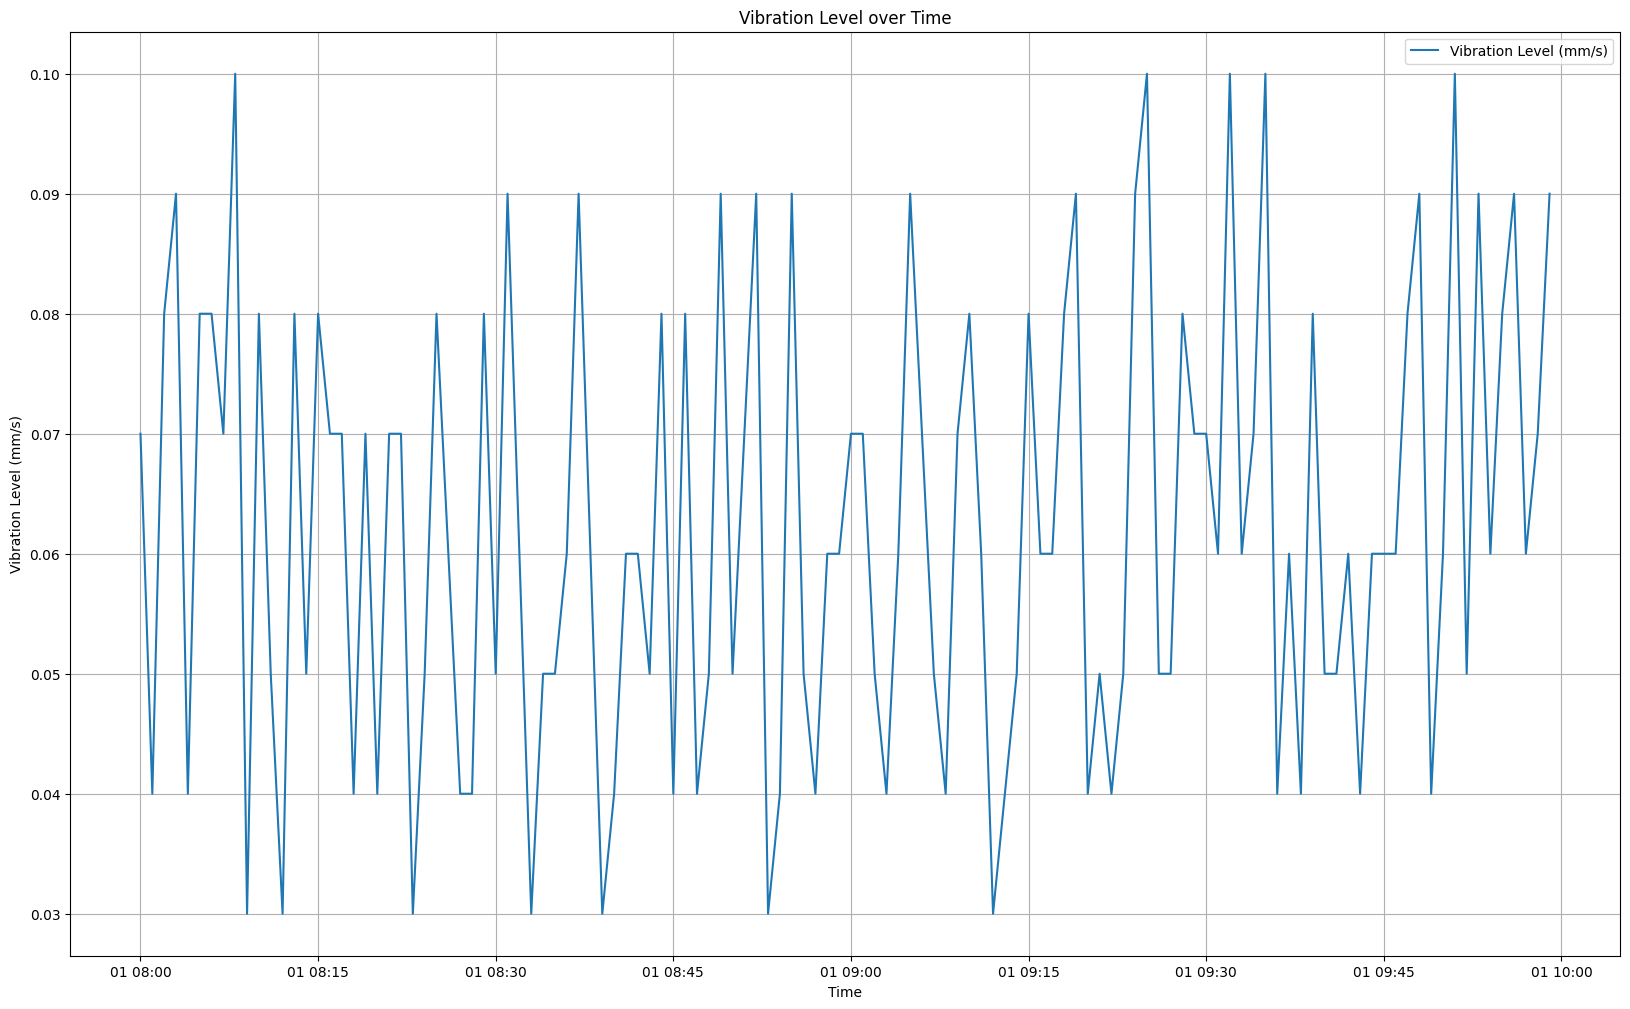

In [25]:
plot_time_series(df, "Vibration Level (mm/s)", 60*2, "Vibration Level over Time")

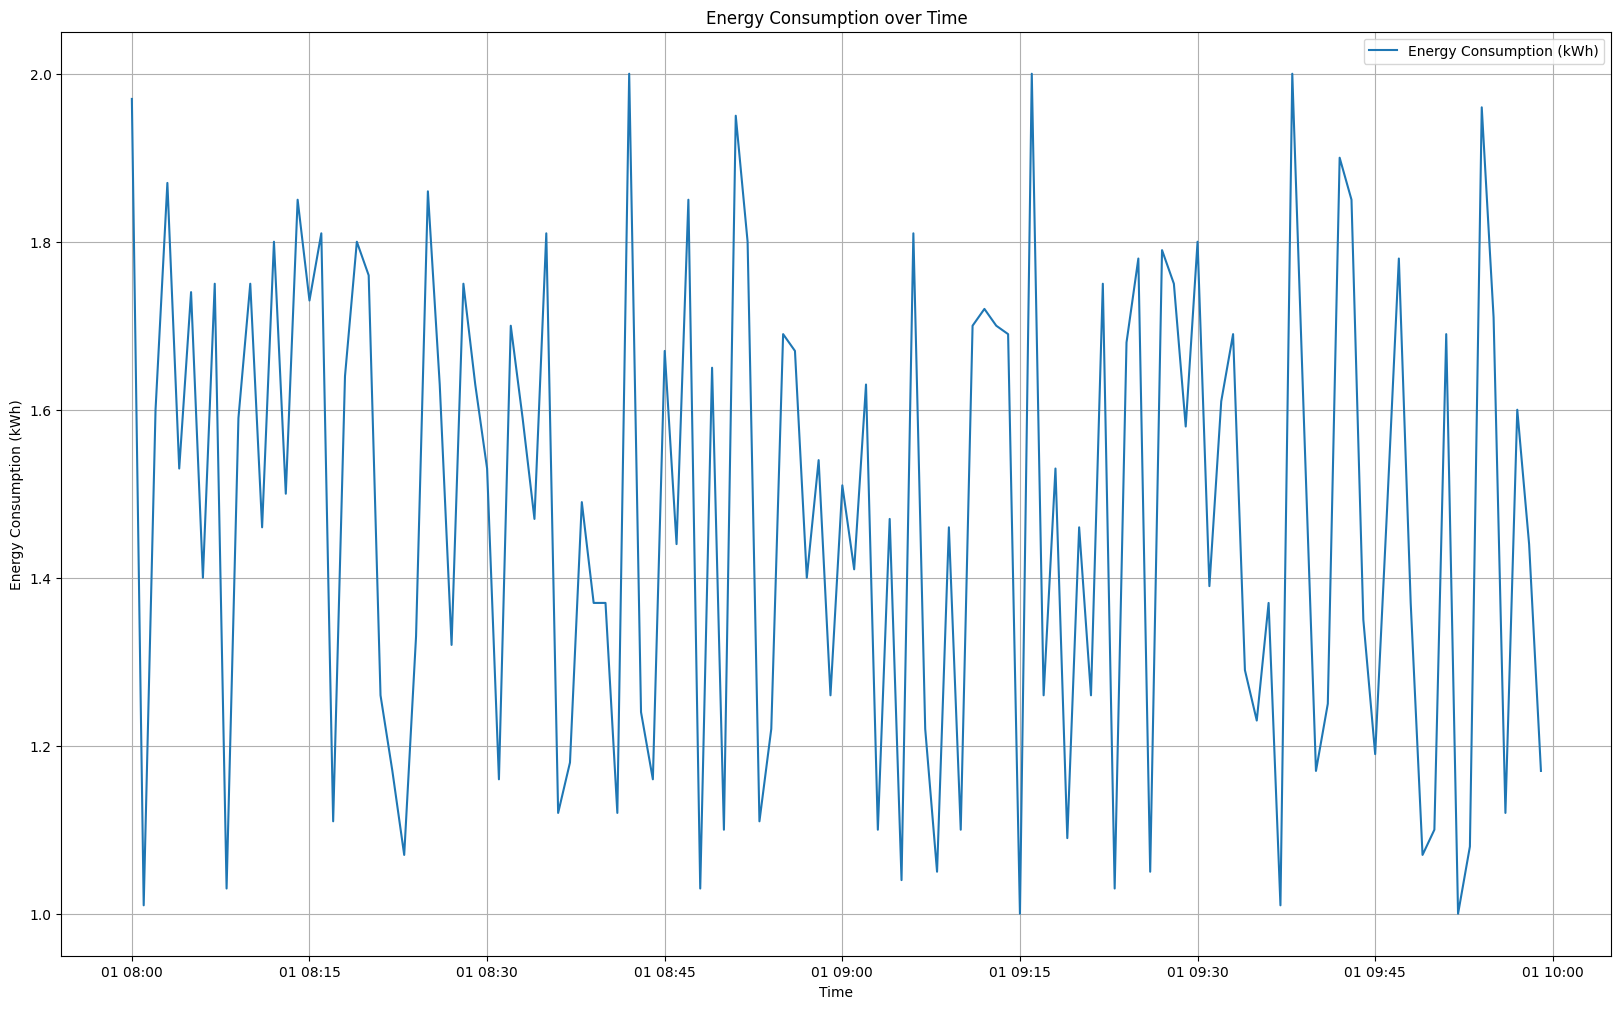

In [26]:
plot_time_series(df, "Energy Consumption (kWh)", 60*2, "Energy Consumption over Time")

plot_time_series 함수를 통해 각 feature의 분포를 시각화하였으나, 현실 세계의 시계열 데이터는 다양한 요인이 적용된 경우가 대부분이기에 해당 데이터 또한 어떠한 추세나 경향을 눈으로 직접 확인하는 것은 불가능했다. 

시계열 데이터로부터 추세와 계절성, 잔차 등의 특성을 분리하여 시각화한 후 살펴보기 위해 decompose_features 함수를 사용하여 데이터를 확인한다. 

In [28]:
def decompose_features(data, features, period=50):
    for col in features:
        result = seasonal_decompose(data[col], model='additive', period=period)
        
        fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
        axes[0].plot(data[col], label='Original')
        axes[0].set_ylabel('Original')
        axes[0].legend(loc='upper left')
        
        axes[1].plot(result.trend, color='orange', label='Trend')
        axes[1].set_ylabel('Trend')
        axes[1].legend(loc='upper left')
        
        axes[2].plot(result.seasonal, color='green', label='Seasonality')
        axes[2].set_ylabel('Seasonal')
        axes[2].legend(loc='upper left')
        
        axes[3].plot(result.resid, color='red', label='Residual')
        axes[3].set_ylabel('Residual')
        axes[3].legend(loc='upper left')
        
        axes[3].set_xlabel('Time')
        fig.suptitle(f'Seasonal Decompose of {col}', fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

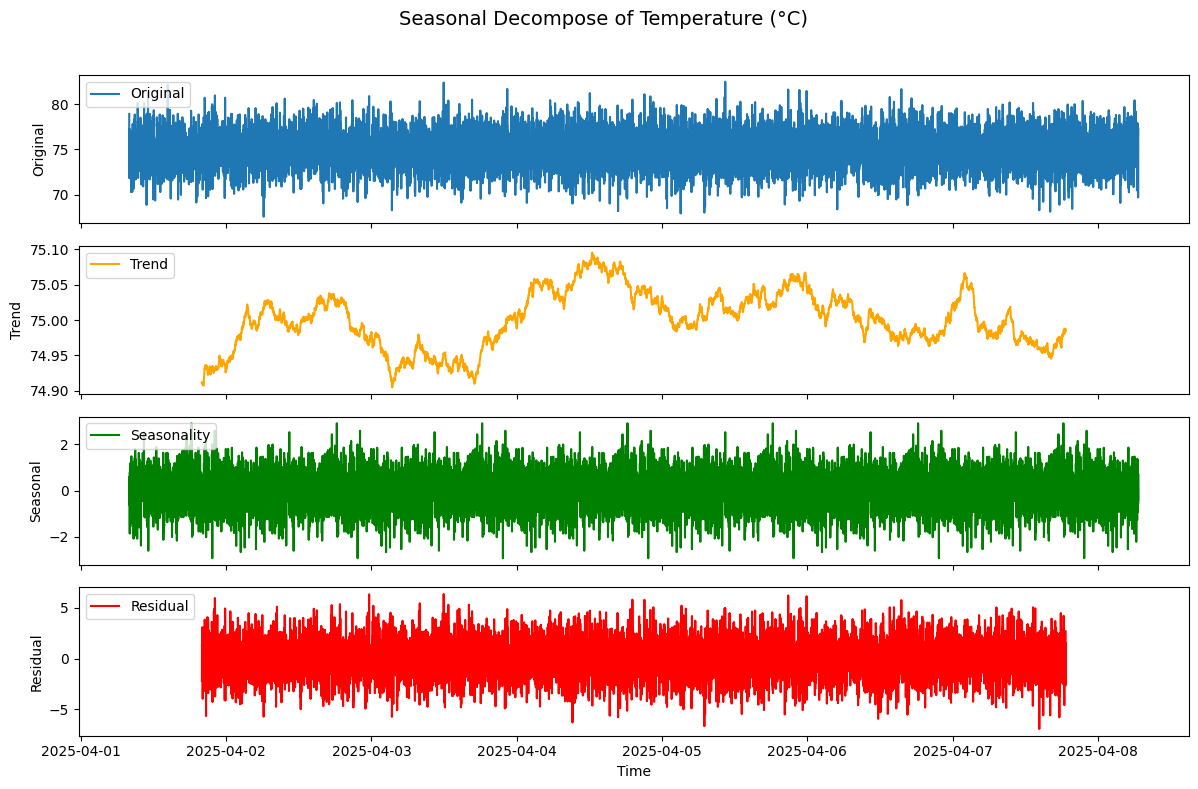

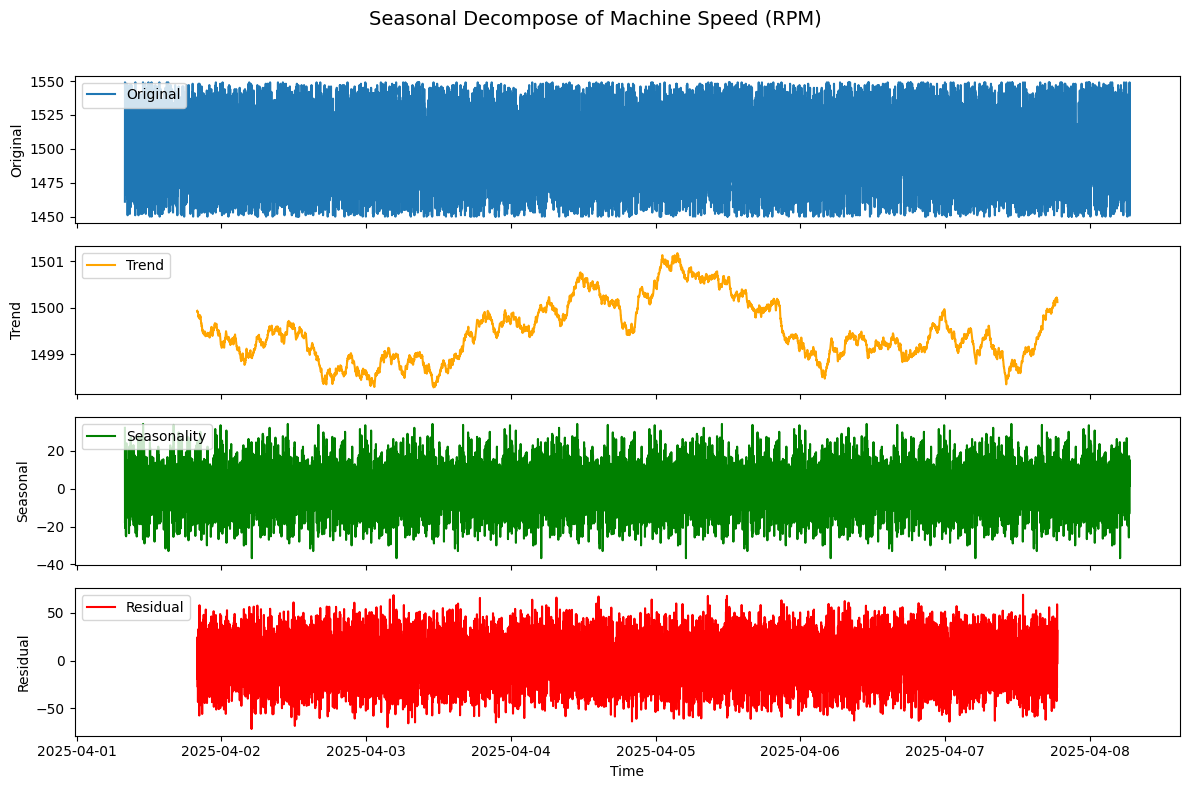

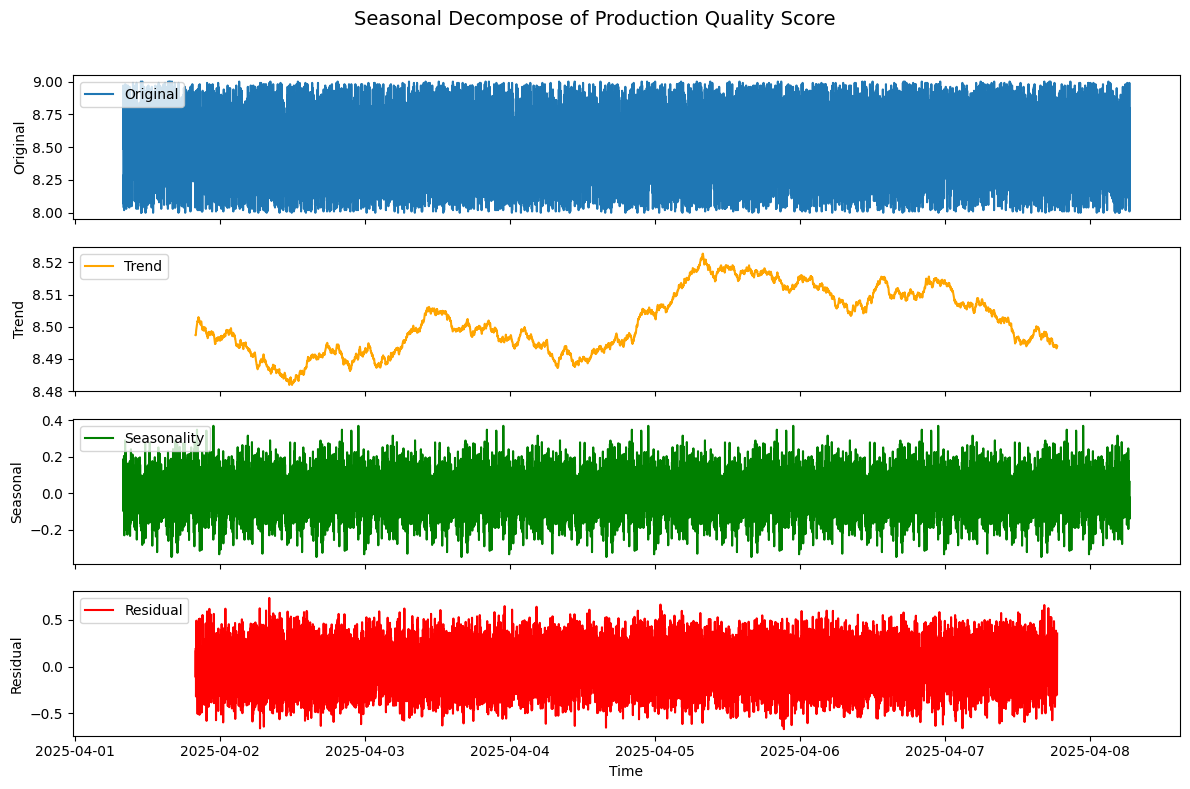

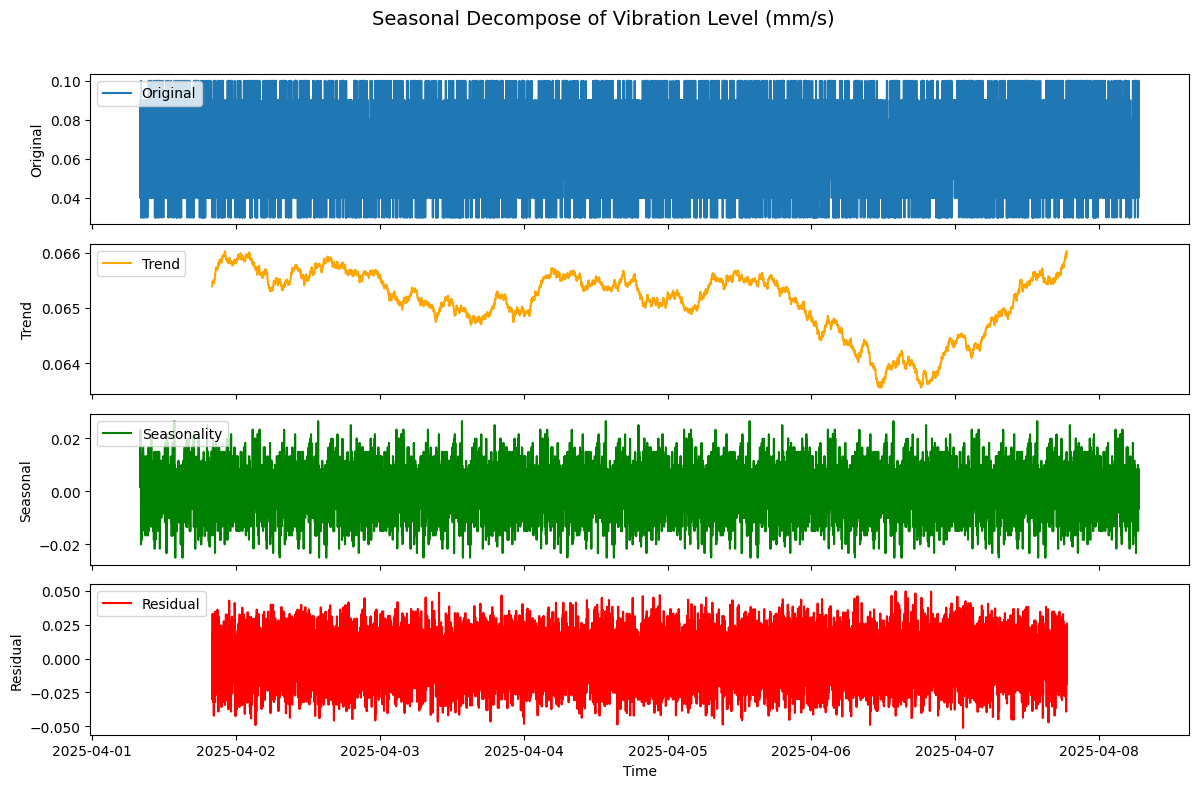

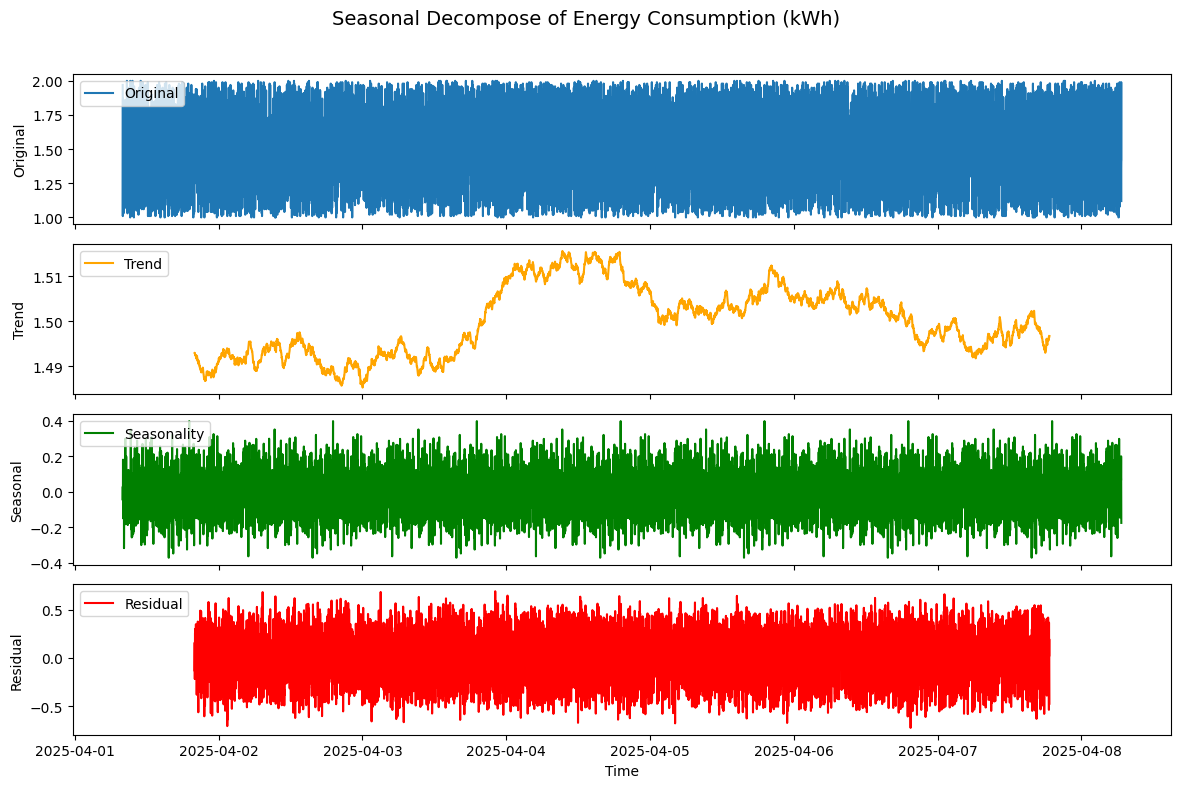

In [31]:
features = ['Temperature (°C)', 'Machine Speed (RPM)',
            'Production Quality Score', 'Vibration Level (mm/s)',
            'Energy Consumption (kWh)']

decompose_features(df, features, period=1440)